In [5]:
pip install praw pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.3 MB/s eta 0:00:00


In [4]:
from configparser import SafeConfigParser
import praw
import pandas as pd
import warnings
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import AutoTokenizer, AutoModelWithLMHead

Develop a script to scrape Reddit posts and comments from specific subreddits related to health conditions relevant to the clinical trial.

In [8]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize the Reddit instance
reddit = praw.Reddit(
    client_id="***********",
    client_secret="***********",
    password="********",
    user_agent="Comment Extraction (by u/USERNAME)",
    username="Latter_Expert6546",
)
# List of subreddits to search in
subreddits = ['BodyDysmorphia', 'Fibromyalgia', 'rarediseases', 'Celiac', 'clinicaltrials', 'clinicalresearch', 'FindClinTrial', 'health', 'AskDocs']

# Scrape data
keyword = 'clinical trial'
reddit_text = []
score = []

for subreddit in subreddits:
    for submission in reddit.subreddit(subreddit).search(keyword, limit=None):
        if keyword.lower() in submission.title.lower() or keyword.lower() in submission.selftext.lower():
            reddit_text.append(submission.selftext)
            score.append(submission.score)

            submission.comments.replace_more(limit=None)
            for comment in submission.comments.list():
                reddit_text.append(comment.body)
                score.append(comment.score)

data = {
    'Text': reddit_text,
    'Score': score
}

# Creating a DataFrame from the dictionary
df = pd.DataFrame(data)
# print(df)
# print(len(df))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

                                                   Text  Score
0     **Hi everyone, I thought this might be of inte...      4
1       \n\nHi everyone!\n\nI work at [Massachusetts...      8
2     I’m 32, and I’ve struggled with an eating diso...     17
3     I am so sorry to hear you are going through th...     13
4     He is not a good person. He sounds like a terr...     10
...                                                 ...    ...
6551  Thank you so much for your response!\n\nYou ha...      1
6552  All that certainly fits with NAFLD, which usua...      2
6553                 Any updates on your AIH diagnosis?      1
6554  Not especially. \n\nHave some blood work to do...      1
6555                                            Post em      1

[6556 rows x 2 columns]
6556


Perform sentiment analysis on the scraped data to determine the general attitude and interest levels regarding clinical trials.

In [1]:
pip install nltk

In [5]:
df = pd.read_csv('/content/drive/MyDrive/df.csv')
print(df)

                                                   Text  Score  \
0     **Hi everyone, I thought this might be of inte...      4   
1       \n\nHi everyone!\n\nI work at [Massachusetts...      8   
2     I’m 32, and I’ve struggled with an eating diso...     17   
3     I am so sorry to hear you are going through th...     13   
4     He is not a good person. He sounds like a terr...     10   
...                                                 ...    ...   
6551  Thank you so much for your response!\n\nYou ha...      1   
6552  All that certainly fits with NAFLD, which usua...      2   
6553                 Any updates on your AIH diagnosis?      1   
6554  Not especially. \n\nHave some blood work to do...      1   
6555                                            Post em      1   

                                           cleaned_text Emotion detected  
0     hi everyone thought might interest living melb...              joy  
1     hi everyone work massachusetts general hospita...  

In [28]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
def clean_comment(comment):
    if not isinstance(comment, str):
        return ''

    # Remove URLs
    comment = re.sub(r'http\S+|www\S+|https\S+', '', comment, flags=re.MULTILINE)

    # Remove user mentions
    comment = re.sub(r'@\w+', '', comment)

    # Remove special characters, numbers, and punctuation
    comment = re.sub(r'\W', ' ', comment)
    comment = re.sub(r'\d', '', comment)

    # Convert to lowercase
    comment = comment.lower()

    # Tokenize
    tokens = word_tokenize(comment)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove extra whitespace
    cleaned_comment = ' '.join(tokens)

    return cleaned_comment

df['cleaned_text'] = df['Text'].apply(clean_comment)
print(df)

                                                   Text  Score  \
0     **Hi everyone, I thought this might be of inte...      4   
1       \n\nHi everyone!\n\nI work at [Massachusetts...      8   
2     I’m 32, and I’ve struggled with an eating diso...     17   
3     I am so sorry to hear you are going through th...     13   
4     He is not a good person. He sounds like a terr...     10   
...                                                 ...    ...   
6551  Thank you so much for your response!\n\nYou ha...      1   
6552  All that certainly fits with NAFLD, which usua...      2   
6553                 Any updates on your AIH diagnosis?      1   
6554  Not especially. \n\nHave some blood work to do...      1   
6555                                            Post em      1   

                                           cleaned_text Emotion detected  
0     hi everyone thought might interest living melb...              joy  
1     hi everyone work massachusetts general hospita...  

In [32]:
# Emotions classified: anger, fear, joy, love, sadness, surprise

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-emotion")

model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-emotion")

def get_emotion(text):
  input_ids = tokenizer.encode(text + '</s>', return_tensors='pt')

  output = model.generate(input_ids=input_ids,
               max_length=2)

  dec = [tokenizer.decode(ids) for ids in output]
  label = dec[0]
  clean_label = label.replace('<pad>', '').strip()
  return clean_label

df['Emotion detected'] = df['cleaned_text'].apply(get_emotion)
print(df)


/usr/local/lib/python3.10/dist-packages/transformers/models/auto/modeling_auto.py:1712: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (786 > 512). Running this sequence through the model will result in indexing errors


                                                   Text  Score  \
0     **Hi everyone, I thought this might be of inte...      4   
1       \n\nHi everyone!\n\nI work at [Massachusetts...      8   
2     I’m 32, and I’ve struggled with an eating diso...     17   
3     I am so sorry to hear you are going through th...     13   
4     He is not a good person. He sounds like a terr...     10   
...                                                 ...    ...   
6551  Thank you so much for your response!\n\nYou ha...      1   
6552  All that certainly fits with NAFLD, which usua...      2   
6553                 Any updates on your AIH diagnosis?      1   
6554  Not especially. \n\nHave some blood work to do...      1   
6555                                            Post em      1   

                                           cleaned_text Emotion detected  
0     hi everyone thought might interest living melb...              joy  
1     hi everyone work massachusetts general hospita...  

In [34]:
sentiment_distribution = df['Emotion detected'].value_counts(normalize=True) * 100
print(sentiment_distribution)

Emotion detected
joy         45.302013
fear        24.633923
anger       16.564979
sadness     10.555217
surprise     2.471019
love         0.427090
long         0.015253
dressing     0.015253
interest     0.015253
Name: proportion, dtype: float64


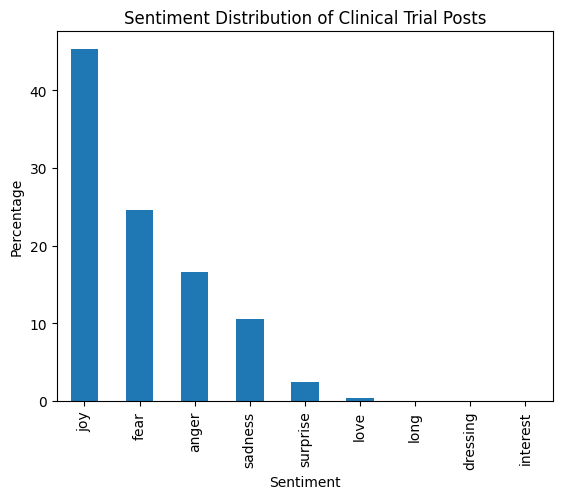

In [35]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
sentiment_distribution.plot(kind='bar')
plt.title('Sentiment Distribution of Clinical Trial Posts')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()


In [36]:
df.to_csv('/content/drive/My Drive/df.csv', index=False)

Use the OpenAI API to generate personalized messages aimed at users who express interest in or could potentially benefit from participating in a clinical trial.

In [9]:
pip install openai

In [8]:
import openai

openai.api_key = '************************'

def generate_message(text, sentiment):
    messages = [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": f"User sentiment: {sentiment}\nUser message: {text}\nGenerate a personalized message encouraging the user to consider participating in a clinical trial:"}
    ]
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages,
        max_tokens=100
    )
    print(response.choices[0].message['content'].strip())
    return response.choices[0].message['content'].strip()

df['personalized_message'] = df.apply(lambda row: generate_message(row['Text'], row['Emotion detected']), axis=1)

print(df)

RateLimitError: You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.